In [ ]:
# https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras/



In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.
/home/rounak/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rounak/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rounak/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rounak/.local/lib/python3.6/site-packages/tensorflow/python

In [2]:
st_reviews = pd.read_csv("data/student_evaluation.csv")

st_reviews.isnull().values.any()

st_reviews.shape

(641, 3)

In [3]:
st_reviews.head()

,comment,suggestion,Sentiment
0,This is one of the beginner and best course in...,NO,positive
1,i would like to include the advance version of...,CS,neutral
2,It is an excellent course for Phd students as ...,NO,positive
3,Presenting two papers 1 mid exam + 1 project a...,NO,positive
4,I really learn a lot from this course which wi...,NO,positive


In [4]:
st_reviews["comment"][3]


'Presenting two papers 1 mid exam + 1 project are more than sufficient to give exposure of the vision field.'

In [5]:
import seaborn as sns

sns.countplot(x='Sentiment', data=st_reviews)

In [6]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [7]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [8]:
X = []
sentences = list(st_reviews['comment'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [9]:
X[3]

'Presenting two papers mid exam project are more than sufficient to give exposure of the vision field '

In [10]:
y = st_reviews['Sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [13]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [14]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('data/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [15]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Simple Neural network

In [16]:

model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          92300     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10001     
Total params: 102,301
Trainable params: 10,001
Non-trainable params: 92,300
_________________________________________________________________
None


In [29]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.1)

Train on 460 samples, validate on 52 samples
Epoch 1/6
460/460 [==============================] - 2s 5ms/step - loss: 0.6934 - acc: 0.4957 - val_loss: 0.6918 - val_acc: 0.5962
Epoch 2/6
460/460 [==============================] - 3s 5ms/step - loss: 0.6932 - acc: 0.4957 - val_loss: 0.6922 - val_acc: 0.5962
Epoch 3/6
460/460 [==============================] - 2s 5ms/step - loss: 0.6932 - acc: 0.4957 - val_loss: 0.6927 - val_acc: 0.5962
Epoch 4/6
460/460 [==============================] - 2s 4ms/step - loss: 0.6932 - acc: 0.4957 - val_loss: 0.6930 - val_acc: 0.5962
Epoch 5/6
460/460 [==============================] - 2s 5ms/step - loss: 0.6932 - acc: 0.4957 - val_loss: 0.6931 - val_acc: 0.5962
Epoch 6/6
460/460 [==============================] - 2s 5ms/step - loss: 0.6932 - acc: 0.4957 - val_loss: 0.6930 - val_acc: 0.5962


In [30]:
score = model.evaluate(X_test, y_test, verbose=1)

129/129 [==============================] - 0s 3ms/step


In [31]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6930222751558289
Test Accuracy: 0.5891472868217055


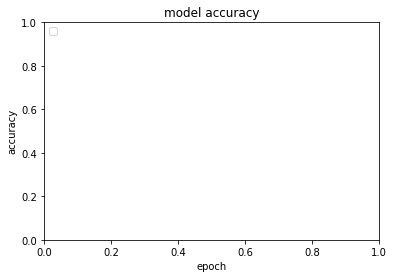

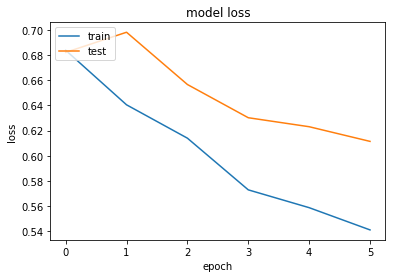

In [21]:
import matplotlib.pyplot as plt

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# LSTM 

In [22]:
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [23]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          92300     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 209,677
Trainable params: 117,377
Non-trainable params: 92,300
_________________________________________________________________
None


In [24]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 409 samples, validate on 103 samples
Epoch 1/6
409/409 [==============================] - 3s 8ms/step - loss: 0.6933 - acc: 0.4866 - val_loss: 0.6932 - val_acc: 0.4951
Epoch 2/6
409/409 [==============================] - 2s 6ms/step - loss: 0.6931 - acc: 0.5086 - val_loss: 0.6933 - val_acc: 0.4951
Epoch 3/6
409/409 [==============================] - 2s 5ms/step - loss: 0.6930 - acc: 0.5086 - val_loss: 0.6934 - val_acc: 0.4951
Epoch 4/6
409/409 [==============================] - 3s 6ms/step - loss: 0.6931 - acc: 0.5086 - val_loss: 0.6934 - val_acc: 0.4951
Epoch 5/6
409/409 [==============================] - 2s 5ms/step - loss: 0.6930 - acc: 0.5086 - val_loss: 0.6934 - val_acc: 0.4951
Epoch 6/6
129/129 [==============================] - 0s 3ms/step


In [25]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6911858135415602
Test Accuracy: 0.5891472868217055


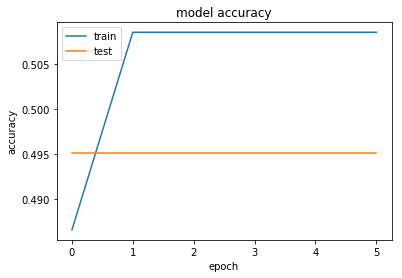

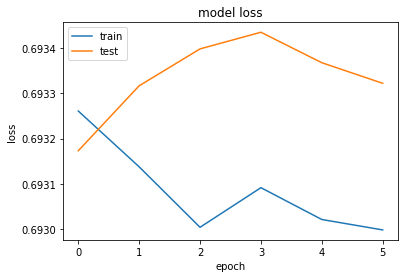

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [27]:
instance = X[57]
print(instance)

It helped me to make better Decisions 


In [28]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[0.4943188]], dtype=float32)